In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [2]:
df=pd.read_csv('Camden_accidents/Camden_accidents2.csv')
df.dtypes

Datetime                      object
Number                        object
Municipality                  object
Date                          object
Day of Week                   object
Severity                      object
Intersection                  object
Crash Type                     int64
Total Vehicles               float64
Location                      object
Road Horizontal Alignment    float64
Road Grade                   float64
Road Surface Type            float64
Surface Condition            float64
Light Condition              float64
Environment Condition        float64
Road Divided By              float64
Posted Speed                 float64
Month                          int64
dtype: object

In [3]:
df.head()

,Datetime,Number,Municipality,Date,Day of Week,Severity,Intersection,Crash Type,Total Vehicles,Location,Road Horizontal Alignment,Road Grade,Road Surface Type,Surface Condition,Light Condition,Environment Condition,Road Divided By,Posted Speed,Month
0,2017-01-01 01:05:00,201704122017-000003,Collingswood Boro,2017-01-01,SU,I,I,11,1.0,US 130 ...,1.0,4.0,2.0,1.0,7.0,1.0,1.0,40.0,1
1,2017-01-01 01:19:00,2017040917-000034,Cherry Hill Twp,2017-01-01,SU,I,B,13,1.0,Other,1.0,4.0,2.0,1.0,6.0,3.0,4.0,25.0,1
2,2017-01-01 01:45:00,20170436A160-2017-00002A,Winslow Twp,2017-01-01,SU,P,B,11,1.0,ATLANTIC CITY EXPRESSWAY ...,1.0,4.0,2.0,1.0,7.0,1.0,1.0,65.0,1
3,2017-01-01 02:08:00,201704152017-000019,Gloucester Twp,2017-01-01,SU,P,I,6,2.0,NJ 168 ...,1.0,4.0,2.0,1.0,6.0,1.0,4.0,25.0,1
4,2017-01-01 07:33:00,2017040917-000064,Cherry Hill Twp,2017-01-01,SU,I,B,1,2.0,ROUTE 561 ...,1.0,4.0,2.0,1.0,1.0,1.0,5.0,45.0,1


In [4]:
df.Municipality.value_counts()

Cherry Hill Twp        7816
Gloucester Twp         5134
Camden City            4837
Pennsauken Twp         3995
Winslow Twp            3151
Bellmawr Boro          2818
Gloucester City        2400
Voorhees Twp           2181
Haddon Twp             1081
Lindenwold Boro        1040
Other                   991
Magnolia Boro           767
Haddon Heights Boro     748
Runnemede Boro          721
Berlin Boro             708
Somerdale Boro          665
Clementon Boro          636
Barrington Boro         615
Collingswood Boro       602
Mount Ephriam Boro      497
Pine Hill Boro          497
Waterford Twp           479
Haddonfield Boro        400
Stratford Boro          395
Lawnside Boro           392
Berlin Twp              368
Name: Municipality, dtype: int64

In [5]:
df=df.astype({'Crash Type':'category', 'Municipality':'category','Total Vehicles':'str','Road Horizontal Alignment':'str', 'Road Grade':'str', 'Road Surface Type':'str',
       'Surface Condition':'str', 'Light Condition':'str', 'Environment Condition':'str','Road Divided By':'str', 'Location':
             'str', 'Intersection':'str'})

In [6]:
df1=df.drop(columns=['Datetime', 'Number', 'Date', 'Day of Week','Road Horizontal Alignment','Environment Condition','Light Condition',
                    'Road Grade','Surface Condition', 'Location'])

In [7]:
df1.loc[df1['Severity']=='F', 'Severity']='I'

In [8]:
df1.Severity[df1['Severity']=='I'].count()/df1.Severity.count()

0.2614831337915965

In [9]:
df1.loc[df1['Severity']=='I', 'Severity']='1'
df1.loc[df1['Severity']=='P', 'Severity']='0'

In [10]:
df1.dtypes
df1.columns

Index(['Municipality', 'Severity', 'Intersection', 'Crash Type',
       'Total Vehicles', 'Road Surface Type', 'Road Divided By',
       'Posted Speed', 'Month'],
      dtype='object')

In [11]:
cat_columns=['Municipality','Intersection', 'Crash Type','Total Vehicles']

In [12]:
X=df1.drop('Severity',axis=1)
y=df1.Severity

In [13]:
X.shape

(43934, 8)

In [14]:
df1.dtypes

Municipality         category
Severity               object
Intersection           object
Crash Type           category
Total Vehicles         object
Road Surface Type      object
Road Divided By        object
Posted Speed          float64
Month                   int64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
import catboost as cb
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_columns)
test_dataset = cb.Pool(X_test,y_test, cat_features=cat_columns)

In [17]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}

In [18]:
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.7607396871
bestIteration = 43

0:	loss: 0.7607397	best: 0.7607397 (0)	total: 1.3s	remaining: 9.12s

bestTest = 0.7605974395
bestIteration = 47

1:	loss: 0.7605974	best: 0.7607397 (0)	total: 2.43s	remaining: 7.3s

bestTest = 0.7607396871
bestIteration = 45

2:	loss: 0.7607397	best: 0.7607397 (0)	total: 3.56s	remaining: 5.94s

bestTest = 0.7607396871
bestIteration = 20

3:	loss: 0.7607397	best: 0.7607397 (0)	total: 4.7s	remaining: 4.7s

bestTest = 0.7610241821
bestIteration = 29

4:	loss: 0.7610242	best: 0.7610242 (4)	total: 6.42s	remaining: 3.85s

bestTest = 0.7611664296
bestIteration = 43

5:	loss: 0.7611664	best: 0.7611664 (5)	total: 8.25s	remaining: 2.75s

bestTest = 0.7607396871
bestIteration = 44

6:	loss: 0.7607397	best: 0.7611664 (5)	total: 9.97s	remaining: 1.42s

bestTest = 0.7610241821
bestIteration = 12

7:	loss: 0.7610242	best: 0.7611664 (5)	total: 11.8s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 1,
 'iterations': 50,
 'learning_rate': 0.1}

In [19]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      6499
           1       0.68      0.14      0.23      2288

    accuracy                           0.76      8787
   macro avg       0.72      0.56      0.54      8787
weighted avg       0.74      0.76      0.69      8787



Text(0.5, 1.0, 'Confusion Matrix of Catboost Model 1')

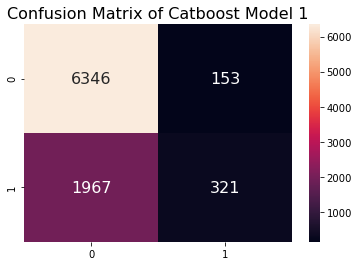

In [20]:
ax=sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Catboost Model 1",fontdict= { 'fontsize': 16} )

In [21]:
df2=pd.read_csv('Camden_accidents/Camden_drivers.csv')
df3=df.merge(df2, on='Number')
df3.columns

Index(['Datetime', 'Number', 'Municipality', 'Date', 'Day of Week', 'Severity',
       'Intersection', 'Crash Type', 'Total Vehicles', 'Location',
       'Road Horizontal Alignment', 'Road Grade', 'Road Surface Type',
       'Surface Condition', 'Light Condition', 'Environment Condition',
       'Road Divided By', 'Posted Speed', 'Month', 'Unnamed: 0',
       'Vehicle Number_x', 'Driver City_x', 'Driver Sex_x', 'Age_x',
       'Vehicle Number_y', 'Driver City_y', 'Driver Sex_y', 'Age_y'],
      dtype='object')

In [22]:
df3.drop(columns=['Datetime', 'Number', 'Date', 'Day of Week', 'Road Horizontal Alignment','Road Grade', 'Road Surface Type',
       'Surface Condition','Unnamed: 0', 'Vehicle Number_x', 'Vehicle Number_y', 'Municipality', 'Driver City_x', 'Driver City_y'], inplace=True)

In [23]:
df3.columns

Index(['Severity', 'Intersection', 'Crash Type', 'Total Vehicles', 'Location',
       'Light Condition', 'Environment Condition', 'Road Divided By',
       'Posted Speed', 'Month', 'Driver Sex_x', 'Age_x', 'Driver Sex_y',
       'Age_y'],
      dtype='object')

In [24]:
df3.Severity[df3.Severity.isin(['I', 'F'])]='1'
df3.Severity[df3.Severity.isin(['P'])]='0'
df3.Severity=df3.Severity.astype('str')

<ipython-input-24-d59b770853a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Severity[df3.Severity.isin(['I', 'F'])]='1'
<ipython-input-24-d59b770853a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.Severity[df3.Severity.isin(['P'])]='0'


In [25]:
cat_columns=['Intersection', 'Crash Type','Total Vehicles', 'Location','Light Condition', 'Environment Condition','Road Divided By',
             'Driver Sex_x','Driver Sex_y']

In [26]:
df3.Severity

0        1
1        1
2        0
3        0
4        1
        ..
41680    0
41681    0
41682    0
41683    0
41684    0
Name: Severity, Length: 41685, dtype: object

In [27]:
X=df3.drop('Severity',axis=1)
y=df3.Severity

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_columns)
test_dataset = cb.Pool(X_test,y_test, cat_features=cat_columns)

In [29]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.751874063
bestIteration = 9

0:	loss: 0.7518741	best: 0.7518741 (0)	total: 1.22s	remaining: 8.51s

bestTest = 0.7530734633
bestIteration = 43

1:	loss: 0.7530735	best: 0.7530735 (1)	total: 2.4s	remaining: 7.21s

bestTest = 0.751874063
bestIteration = 9

2:	loss: 0.7518741	best: 0.7530735 (1)	total: 3.59s	remaining: 5.98s

bestTest = 0.7530734633
bestIteration = 49

3:	loss: 0.7530735	best: 0.7530735 (1)	total: 4.77s	remaining: 4.77s

bestTest = 0.752023988
bestIteration = 18

4:	loss: 0.7520240	best: 0.7530735 (1)	total: 6.53s	remaining: 3.92s

bestTest = 0.7535232384
bestIteration = 48

5:	loss: 0.7535232	best: 0.7535232 (5)	total: 8.29s	remaining: 2.76s

bestTest = 0.751874063
bestIteration = 12

6:	loss: 0.7518741	best: 0.7535232 (5)	total: 9.97s	remaining: 1.42s

bestTest = 0.7542728636
bestIteration = 47

7:	loss: 0.7542729	best: 0.7542729 (7)	total: 11.7s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 50,
 'learning_rate': 0.1}

In [30]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      6130
           1       0.71      0.09      0.17      2207

    accuracy                           0.75      8337
   macro avg       0.73      0.54      0.51      8337
weighted avg       0.74      0.75      0.67      8337



In [31]:

print(confusion_matrix(y_test, pred))

[[6045   85]
 [1998  209]]


Text(0.5, 1.0, 'Confusion Matrix of Catboost Model 2')

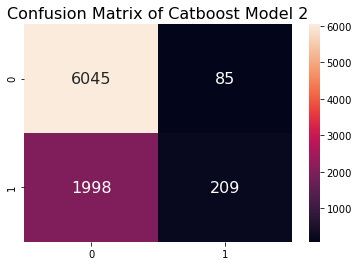

In [32]:
ax=sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Catboost Model 2",fontdict= { 'fontsize': 16} )

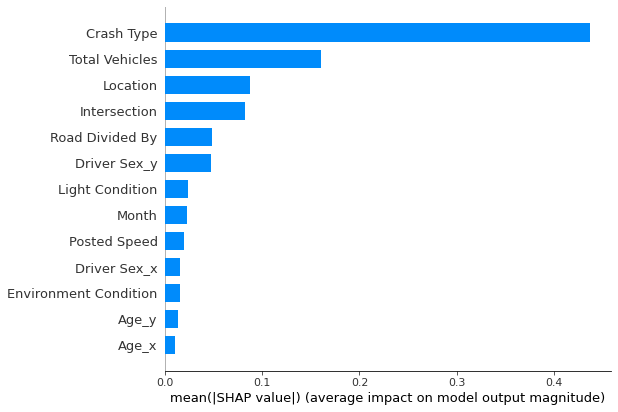

In [33]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [34]:
df4=pd.read_csv('Camden_accidents/Camden_V3.csv')
df5=df.merge(df4, on='Number')
df5.columns

Index(['Datetime', 'Number', 'Municipality', 'Date', 'Day of Week', 'Severity',
       'Intersection', 'Crash Type', 'Total Vehicles', 'Location',
       'Road Horizontal Alignment', 'Road Grade', 'Road Surface Type',
       'Surface Condition', 'Light Condition', 'Environment Condition',
       'Road Divided By', 'Posted Speed', 'Month', 'Unnamed: 0',
       'Initial Impact Location_x', 'Principal Damage Location_x',
       'Extent of Damage_x', 'Vehicle Type_x', 'Vehicle Use_x', 'V_Age_x',
       'Initial Impact Location_y', 'Principal Damage Location_y',
       'Extent of Damage_y', 'Vehicle Type_y', 'Vehicle Use_y', 'V_Age_y'],
      dtype='object')

In [35]:
df5.drop(columns=['Datetime', 'Number', 'Date', 'Day of Week', 'Road Horizontal Alignment','Road Grade', 'Road Surface Type',
       'Surface Condition','Unnamed: 0', 'Location', 'Light Condition'], inplace=True)

In [36]:
df5.dropna(inplace=True)

In [37]:
df5[['Initial Impact Location_x','Principal Damage Location_x', 'Vehicle Type_x', 'Vehicle Use_x', 
                    'Initial Impact Location_y','Principal Damage Location_y', 'Vehicle Type_y', 'Vehicle Use_y']]=df5[['Initial Impact Location_x','Principal Damage Location_x', 'Vehicle Type_x', 'Vehicle Use_x', 
                    'Initial Impact Location_y','Principal Damage Location_y', 'Vehicle Type_y', 'Vehicle Use_y']].astype('str')

In [38]:
df5.Severity[df5.Severity.isin(['I', 'F'])]='1'
df5.Severity[df5.Severity.isin(['P'])]='0'
df5.Severity=df5.Severity.astype(int)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
df5.Severity.dtypes

dtype('int32')

In [40]:
df5.columns

Index(['Municipality', 'Severity', 'Intersection', 'Crash Type',
       'Total Vehicles', 'Environment Condition', 'Road Divided By',
       'Posted Speed', 'Month', 'Initial Impact Location_x',
       'Principal Damage Location_x', 'Extent of Damage_x', 'Vehicle Type_x',
       'Vehicle Use_x', 'V_Age_x', 'Initial Impact Location_y',
       'Principal Damage Location_y', 'Extent of Damage_y', 'Vehicle Type_y',
       'Vehicle Use_y', 'V_Age_y'],
      dtype='object')

In [41]:
cat_columns=['Intersection', 'Crash Type', 'Total Vehicles',
       'Environment Condition', 'Road Divided By', 'Initial Impact Location_x', 'Principal Damage Location_x',
       'Vehicle Type_x', 'Vehicle Use_x','Initial Impact Location_y', 'Principal Damage Location_y',
       'Vehicle Type_y', 'Vehicle Use_y','Municipality']

In [42]:
X=df5.drop('Severity',axis=1)
y=df5.Severity

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_dataset = cb.Pool(X_train,y_train, cat_features=cat_columns)
test_dataset = cb.Pool(X_test,y_test, cat_features=cat_columns)

In [44]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy') 
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6],
'l2_leaf_reg': [1, 3],
'iterations': [50]}
model.grid_search(grid,train_dataset) 
model.get_params()


bestTest = 0.7892804699
bestIteration = 31

0:	loss: 0.7892805	best: 0.7892805 (0)	total: 1.49s	remaining: 10.4s

bestTest = 0.7929515419
bestIteration = 43

1:	loss: 0.7929515	best: 0.7929515 (1)	total: 3.02s	remaining: 9.05s

bestTest = 0.7872246696
bestIteration = 41

2:	loss: 0.7872247	best: 0.7929515 (1)	total: 4.52s	remaining: 7.54s

bestTest = 0.7919236417
bestIteration = 37

3:	loss: 0.7919236	best: 0.7929515 (1)	total: 6.11s	remaining: 6.11s

bestTest = 0.7901615272
bestIteration = 48

4:	loss: 0.7901615	best: 0.7929515 (1)	total: 8.19s	remaining: 4.91s

bestTest = 0.7945668135
bestIteration = 48

5:	loss: 0.7945668	best: 0.7945668 (5)	total: 10.3s	remaining: 3.43s

bestTest = 0.7895741557
bestIteration = 32

6:	loss: 0.7895742	best: 0.7945668 (5)	total: 12.4s	remaining: 1.77s

bestTest = 0.795154185
bestIteration = 48

7:	loss: 0.7951542	best: 0.7951542 (7)	total: 14.5s	remaining: 0us
Estimating final quality...


{'loss_function': 'Logloss',
 'eval_metric': 'Accuracy',
 'depth': 6,
 'l2_leaf_reg': 3,
 'iterations': 50,
 'learning_rate': 0.1}

In [45]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      6248
           1       0.69      0.32      0.44      2264

    accuracy                           0.78      8512
   macro avg       0.74      0.64      0.65      8512
weighted avg       0.77      0.78      0.75      8512



Text(0.5, 1.0, 'Confusion Matrix of Catboost Model 3')

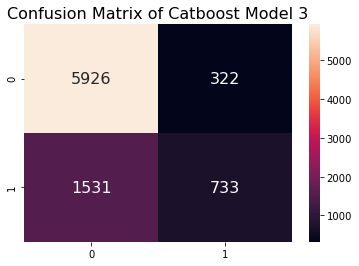

In [46]:
ax=sns.heatmap(confusion_matrix(y_test, pred),annot=True, fmt=".0f", annot_kws={"size": 16})
ax.set_title("Confusion Matrix of Catboost Model 3",fontdict= { 'fontsize': 16} )

In [47]:
y.value_counts()

0    31481
1    11077
Name: Severity, dtype: int64

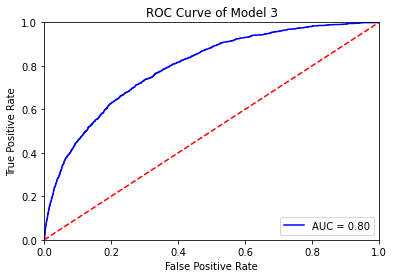

In [48]:
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('ROC Curve of Model 3')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



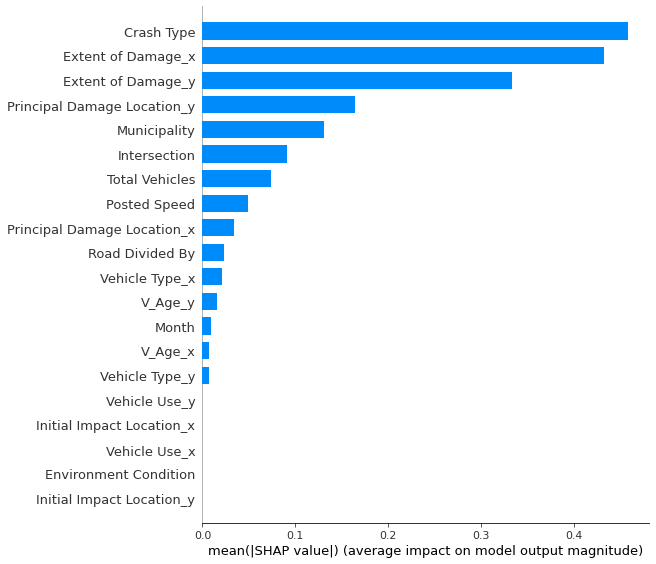

In [49]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")